In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 10 # Количество щелей
b = 0.1e-3 # Ширина щелей
d = 0.2e-3 # Период решетки
l = 55e-9 # Длина волны
D = 1 # Расстояние между щелями и экраном
X = 1e-3 # Максимальная координата
I_0 = 1 # Интенсивность в центре

dx = 1e-5 # Шаг

In [3]:
def coordinate_to_angle(x):
    return np.arctan(x / D)


def intensity(x, l):
    if (abs(x) == 0): 
        return I_0 * N**2
    phi = abs(coordinate_to_angle(x))
    alpha = I_0*(np.sin(np.pi * b * np.sin(phi) / l) / (np.pi * b * np.sin(phi) / l))**2 * (np.sin(N * np.pi * d * np.sin(phi) / l) / np.sin(np.pi * d * np.sin(phi) / l))**2
    return alpha

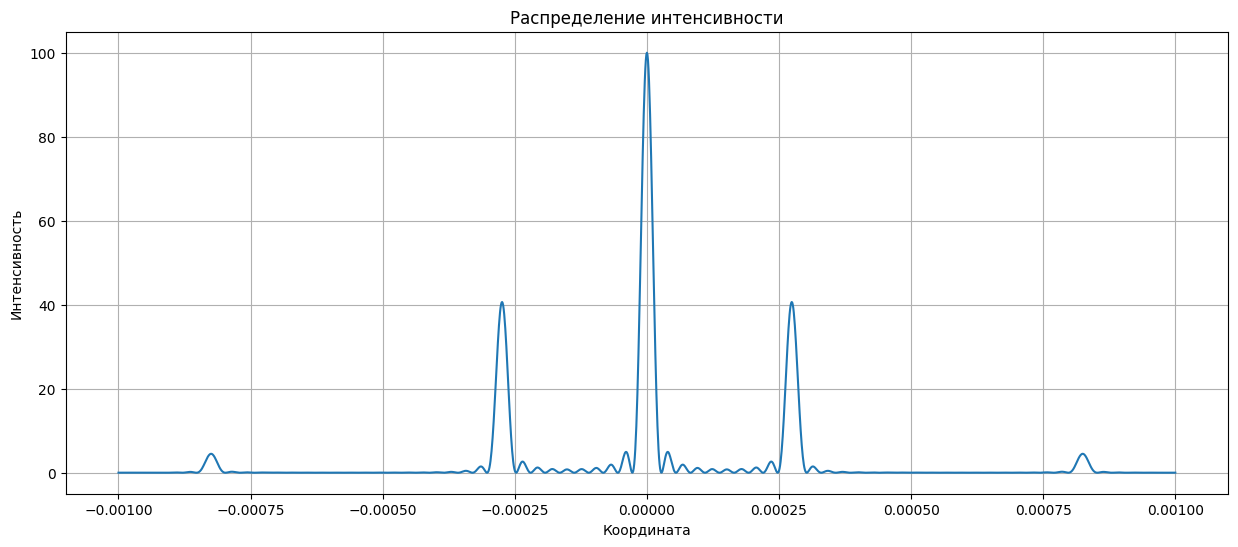

In [4]:
x0 = -X
xf = X

num_steps = int((xf - x0) / dx) + 1

x = np.linspace(x0, xf, num_steps)
I = np.zeros(num_steps)


for i in range(num_steps):
    I[i] = intensity(x0 + dx*i, l)

plt.figure(figsize=(15, 6))
plt.plot(x, I)
plt.title('Распределение интенсивности')
plt.xlabel('Координата')
plt.ylabel('Интенсивность')
plt.grid(True)
plt.show()

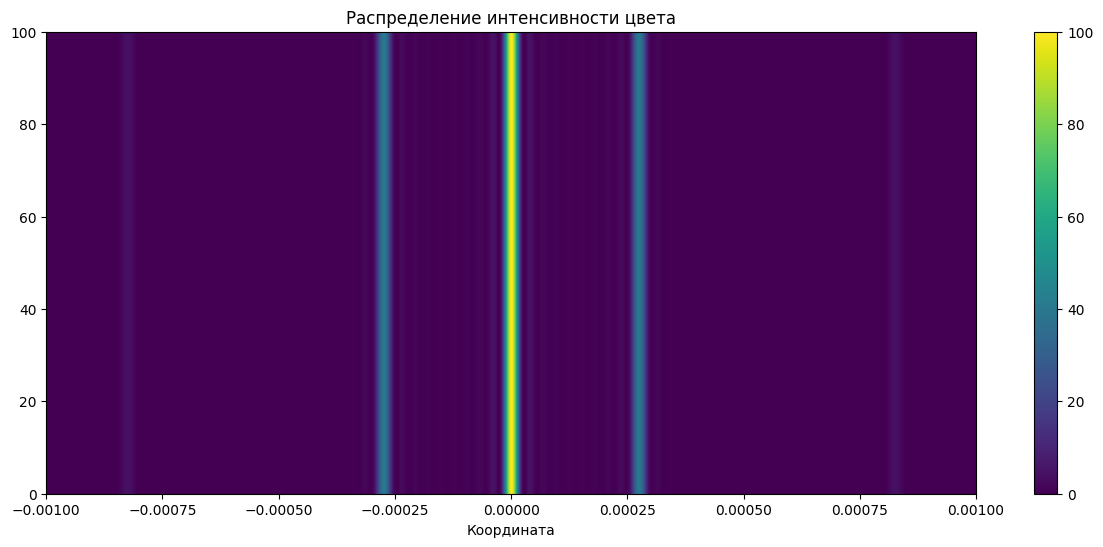

In [5]:
plt.figure(figsize=(15, 6))
plt.imshow(np.tile(I, (100, 1)), aspect='auto', extent=[ -X, X, 0, I_0 * N**2])
plt.title('Распределение интенсивности цвета')
plt.xlabel('Координата')
plt.colorbar()

In [6]:
def quasi_monochromatic_intensity(x, l, dl, num_steps):
    wavelengths = np.linspace(l - dl / 2, l + dl / 2, num_steps)
    I = 0
    for lambd in wavelengths:
        I += intensity(x, lambd)
    
    return I / len(wavelengths)

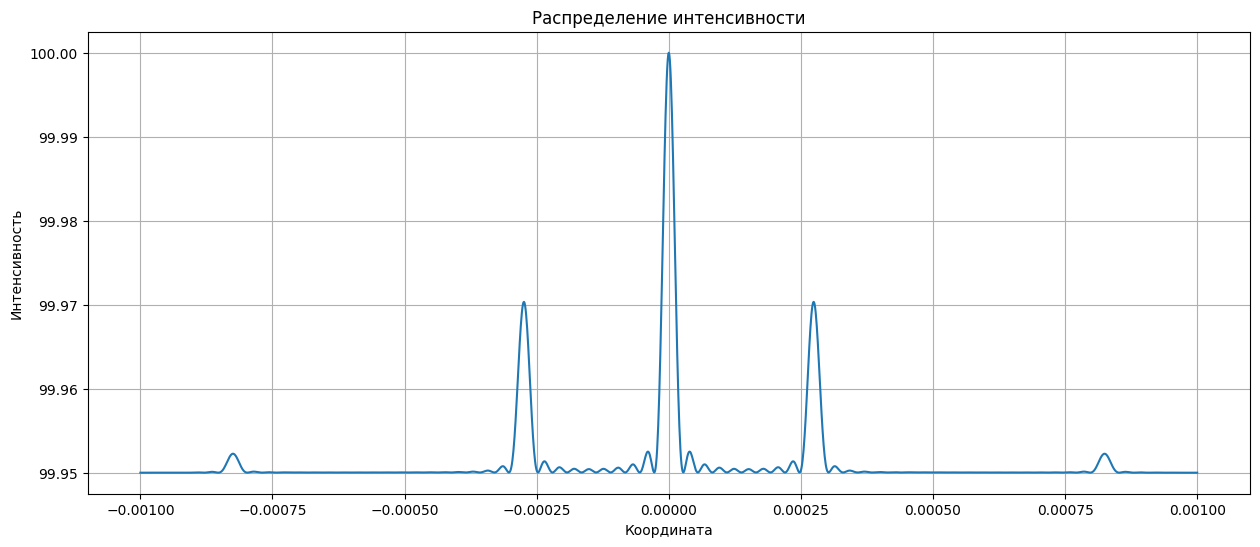

In [7]:
x0 = -X
xf = X

dl = 0.5

num_steps = int((xf - x0) / dx) + 1
x = np.linspace(x0, xf, num_steps)

I = np.zeros(num_steps)


for i in range(num_steps):
    I[i] = quasi_monochromatic_intensity(x0 + dx*i, l, dl, num_steps)

plt.figure(figsize=(15, 6))
plt.plot(x, I)
plt.title('Распределение интенсивности')
plt.xlabel('Координата')
plt.ylabel('Интенсивность')
plt.grid(True)
plt.show()

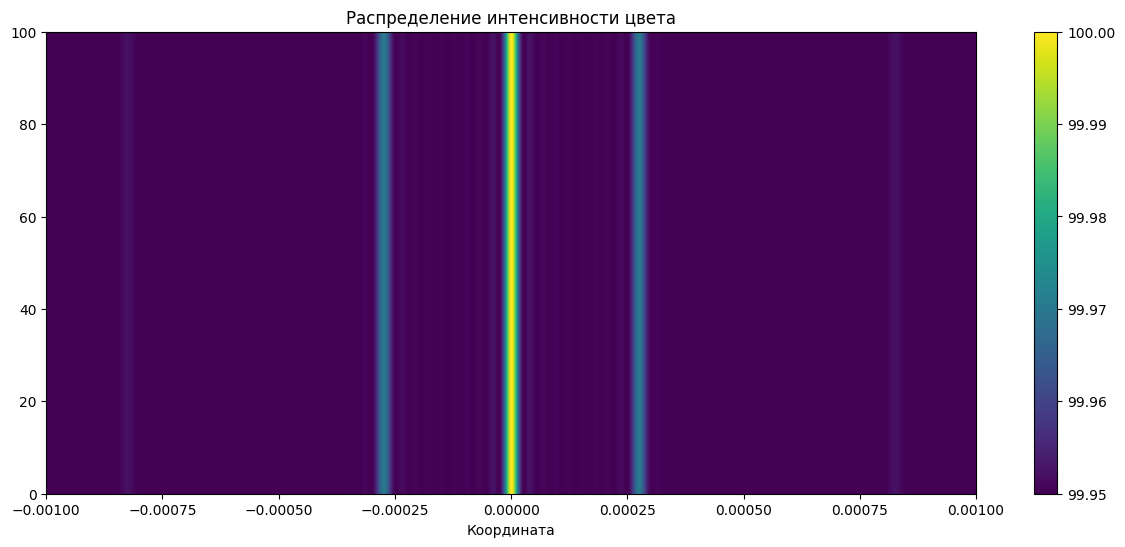

In [8]:
plt.figure(figsize=(15, 6))
plt.imshow(np.tile(I, (100, 1)), aspect='auto', extent=[ -X, X, 0, I_0 * N**2])
plt.title('Распределение интенсивности цвета')
plt.xlabel('Координата')
plt.colorbar()